In [1]:
from IPython.display import YouTubeVideo, Image

# Visualization


## Contents

1. [Introduction](#Introduction)
2. [Rationale](#Rationale)
3. [History](#History)
4. [Cleveland's Research on Decoding](#Cleveland's-Research-on-Decoding)
5. [Human Preattentive Processing](#Human-Preattentive-Processing)
6. [Gestalt Principles of Visual Perception](#Gestalt-Principles-of-Visual-Perception)
7. [Fundamental Building Blocks](#Fundamental-Building-Blocks)
8. [Expressing Quantitative Relationships with Charts](#Expressing-Quantitative-Relationships-with-Charts)
    1. [Time Series](#Time-Series)
    2. [Ranking](#Ranking)
    3. [Part/Whole](#Part/Whole)
    4. [Deviation](#Deviation)
    5. [Distribution](#Distribution)
    6. [Correlation](#Correlation)
    7. [Geospatial](#Geospatial)
    8. [Nominal](#Nominal)
9. [Chart Parts](#Chart-Parts)
    1. [Libraries](#Libraries)
9. [Final Comments](#Final-Comments)
    1. [Small Multiples](#Small-Multiples)
    2. [Rules](#Rules)
9. [References](#References)

## [Introduction](#Contents)

Visualization is a vast and sometimes contentious topic. It ranges from simple tables and charts to infographics to interactive multimedia presentations and dashboards. To adequately cover all this ground would require an entire semester. To skim it would require several weeks. We have one. This is a common theme in survey courses.

Therefore, I'm going to concentrate on the most important, most salient aspects of Visualization concentrating on tables and charts. During the course of this discussion, I will provide a set of rules. These rules are absolute for the duration of this course but they are really rules of thumb. In the tradition of the Salons of Paris, you need to know the rules before you can break them.

## [Rationale](#Contents)

One salient question is, why are we talking about this? Don't you just choose a few options in Excel, click a few buttons in Tableau or copy a few lines of Python? I think it's sort of interesting that we spend years in school learning effective oral and written communication plus some amount of time learning effective numerical communication (math, probability) but visual communication is thought to be either beyond the average person (a designer is required) or can simply be reduced to a button click (for example, Excel or PowerPoint).

If I want to communicate a set of numbers to you, so that you can look them up and use them yourself then a table is a very effective form of communication:

| Region | Sales |
|:------:|------:|
| A      | 29    |
| B      | 18    |
| C      | 17    |
| D      | 23    |
| E      | 13    |

If, however, I want you to be able to compare the numbers, a table is not necessarily the best way to go. We can hold only a few things in our head at the same time (the limit on short term memory). So while we can scrutinize the above table and determine that:

1. Region A was the best performer; Region E was the worse.
2. Region A had slightly more than two times the sales of Region E.
3. Regions B and C had approximately the same amount of sales.
4. The difference in sales between Region A and region D is about the same as Region D and Region B.

It's not easy to determine all of those things (we need to compare every number to every other number) and to hold all those things in our head at once. The more data this is, the harder this gets.

Charts come to our rescue by harnessing our extraordinary visual perception abilities. If I express the numbers above using a chart, we have the following:

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

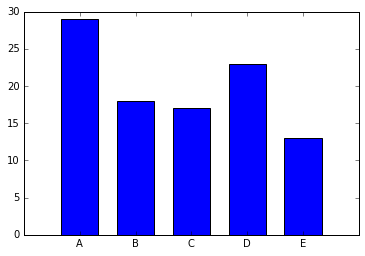

In [4]:
sales = [29, 18, 17, 23, 13]
x = range( len( sales))
width = 1/1.5

figure, axes = plt.subplots()

axes.bar(x, sales, width, color="blue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(["A", "B", "C", "D", "E"])

plt.show()

Aside from some weirdness with `matplotlib` which we will deal with later, this chart is pretty serviceable. We can see at once all of the sales figures and how they relate to each other because they have been encoded as areas (the bars) which use a common baseline (the x-axis). It takes only a moment to see that A and D are nearly the same with D being slightly less. B, C and E are the same with E being the smallest.

Even here, there are several improvments we can make:

1. The color is oversaturated.
2. Horizontal grid lines could help in value decoding.
3. If we want to highlight the relationships between sales of the different regions, we can sort them.

We are also missing titles, labels for the y and x axes, units for the y axis.

The only improvement we might make is to sort the regions in ascending or descending order:

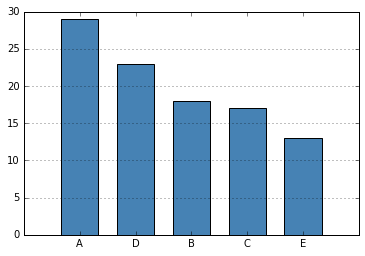

In [86]:
sales = [29, 23, 18, 17, 13]
width = 1/1.5

figure, axes = plt.subplots()

axes.bar(x, sales, width, color="steelblue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(["A", "D", "B", "C", "E"])
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 30))

plt.show()

The main point is that by encoding the information and presenting it in a graphical way, we can exploit our vastly superior visual perception abilities to decode relationships and patterns. **If** we properly encode the information. This module is about properly encoding information.

**The purpose of visualization is to encode information in such a way that viewers will easily and properly decode the information**

However, as the Bard says, "Tis many a slip, twixt cup and a lip."

## [History](#Contents)

Strangely, many of the topics in Data Science are of relatively recent invention. Take Probability, for example. Probability was more or less invented in 1654 to settle a gambling dispute. Today, it is a general calculus for dealing with uncertainty. And while 400 years may seem like a long time, Egyptians were using geometry in 3000 BC...so not 400 years ago but 5,000 years ago.

Similarly, the use of graphics to visualize numbers and their relationships is even more recent. While there were a few examples here and there, the Progenitor of visualization is generally considered to be [William Playfair](https://en.wikipedia.org/wiki/William_Playfair) (1759-1823). In his treatise, *Commercial and Political Atlas*, published in 1786 (with subsequent editions) and *Statistical Brevary* in 1801 introduced a host of charts we use today. (I cannot think of higher praise than the following given Playfair, 'Ian Spence and Howard Wainer in 2001 describe Playfair as "engineer, political economist and scoundrel"').

Here are a few examples from the *Commercial and Political Atlas* and *Statistical Brevary*.

**Image 1.** Here we have an example of a line chart (a rather famous one) showing the balance of trade between England and North America.

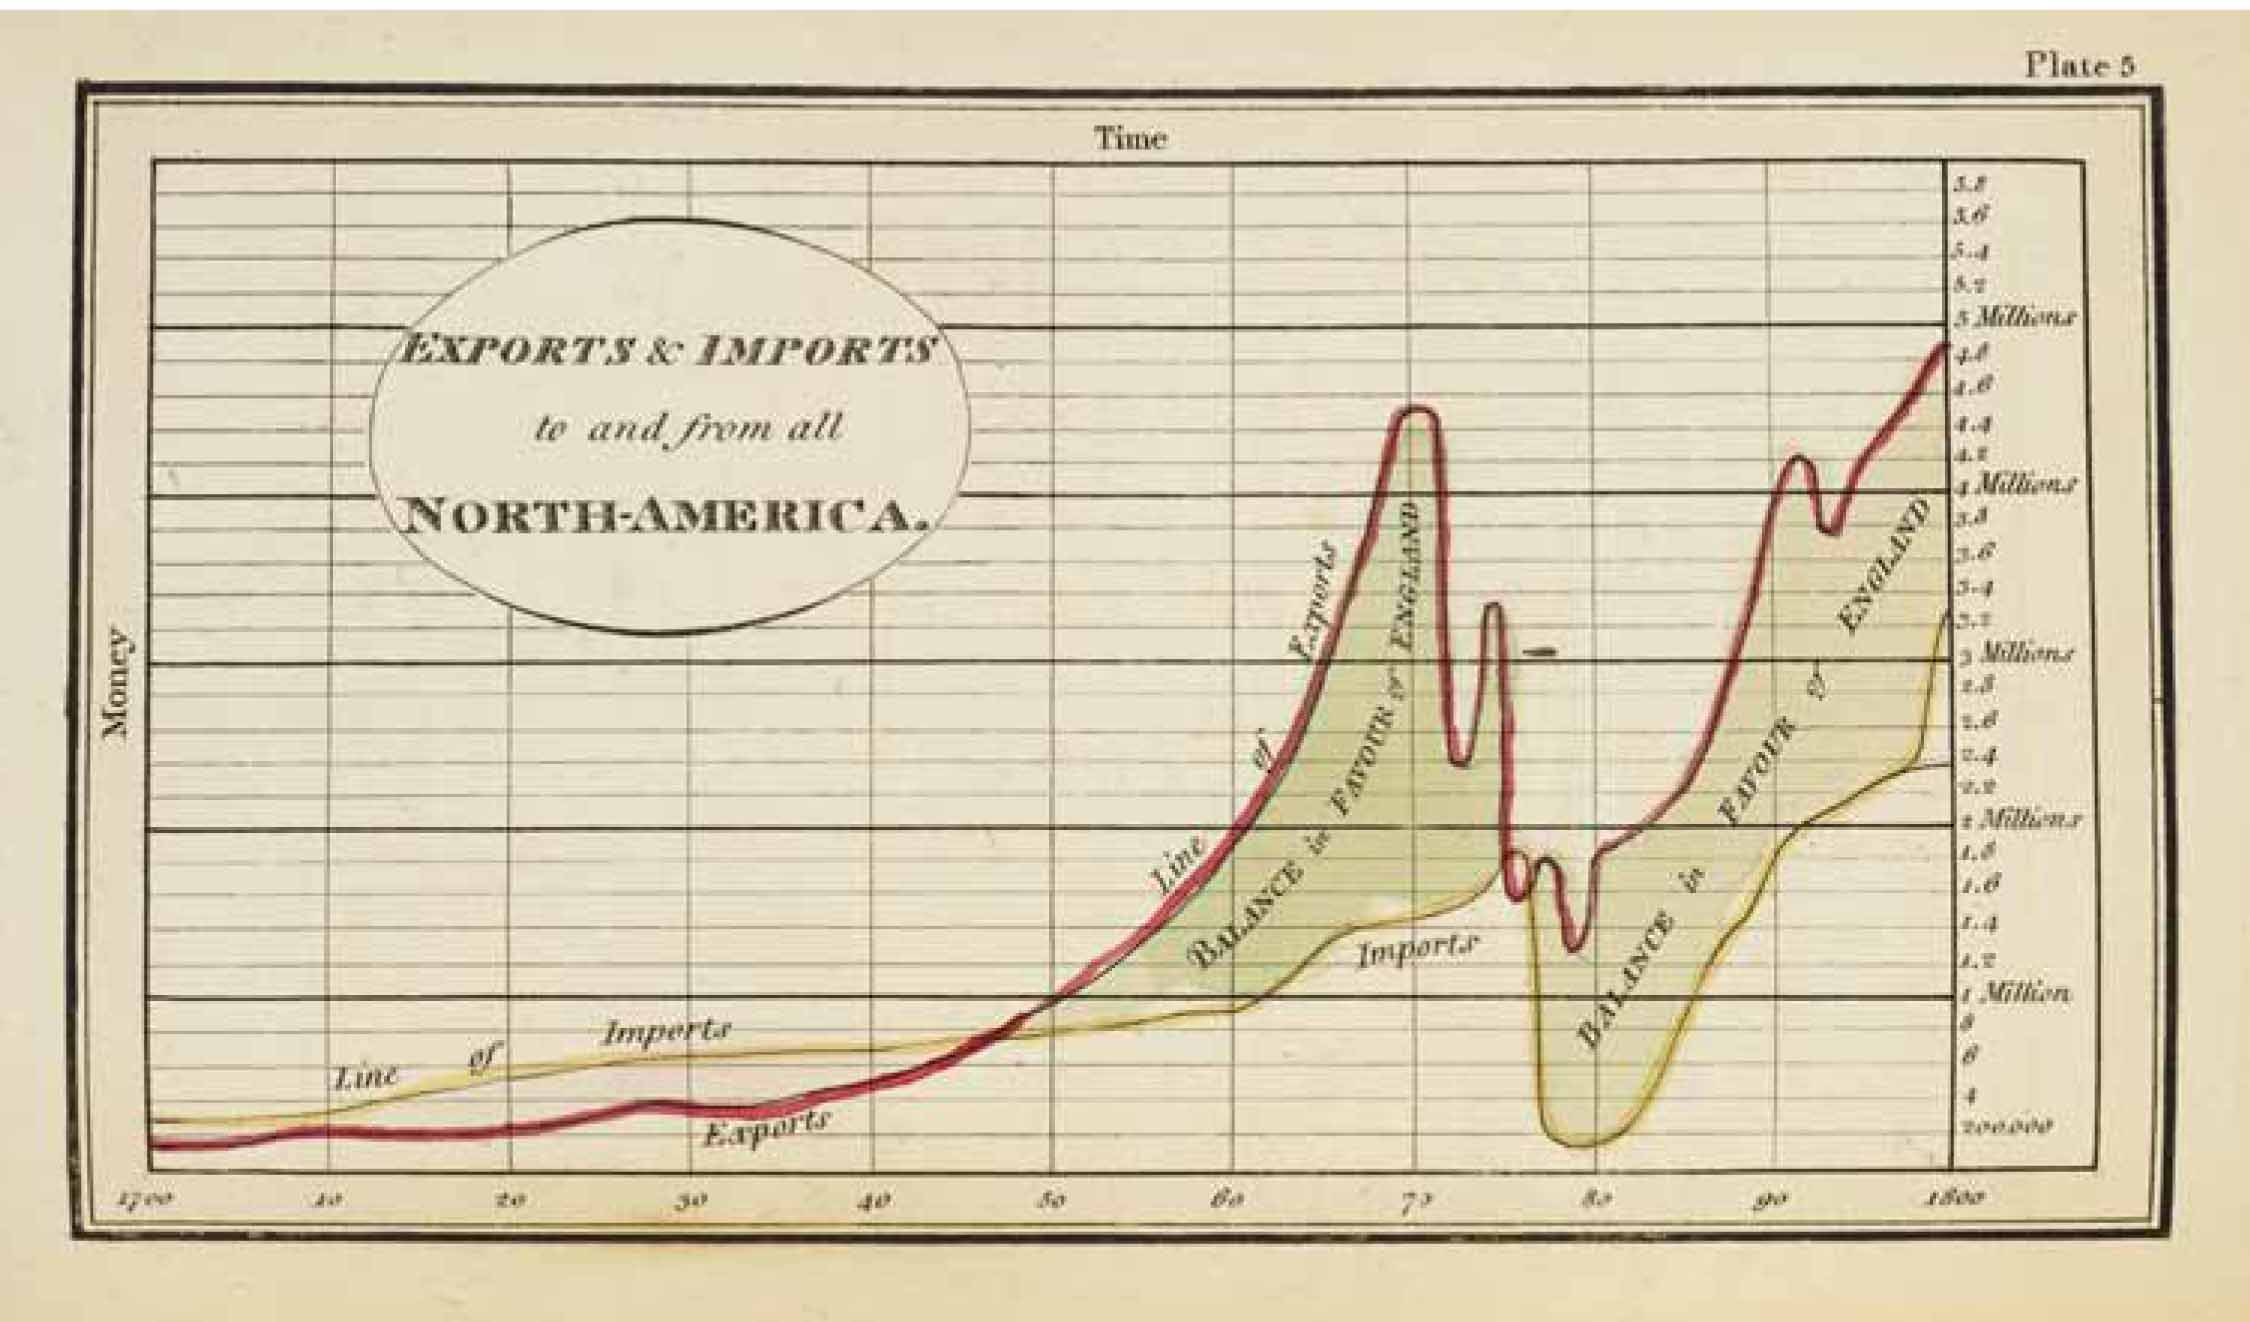

In [9]:
Image("resources/images/040/playfair01.jpg")

**Image 2.** This chart is a typical bar chart that looks like something Excel might generate.

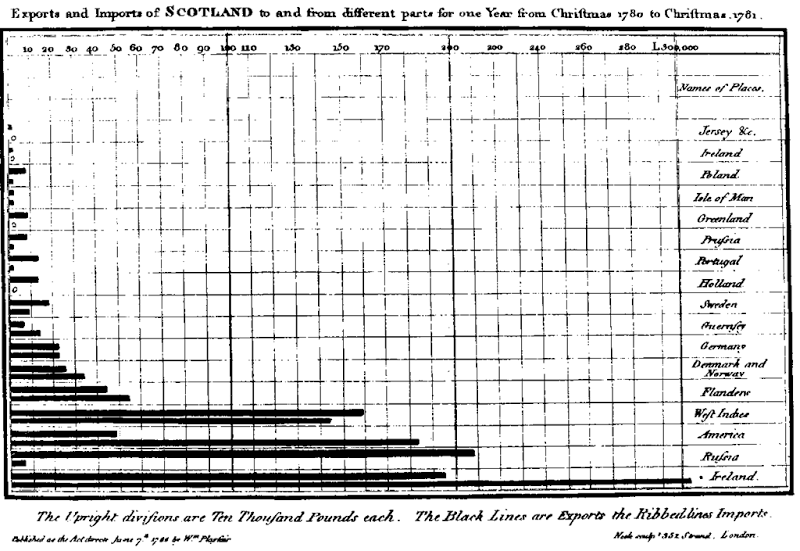

In [10]:
Image("resources/images/040/playfair02.png")

**Image 3.** This image combines both a line chart and bar chart.

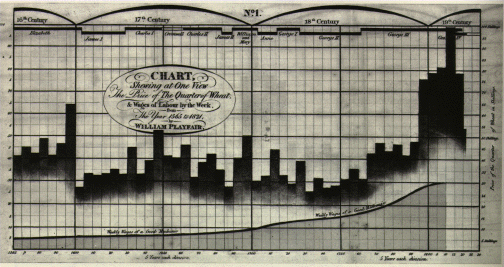

In [12]:
Image("resources/images/040/playfair03.png")

**Image 4.** Finally, we have the first attempt at a pie chart plus what I might call the first infographic.

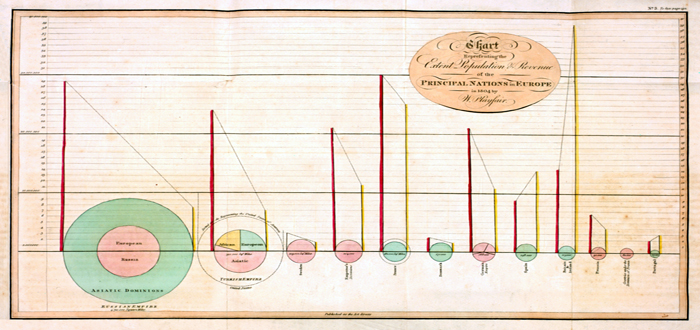

In [13]:
Image("resources/images/040/playfair04.jpg")

A few hundred years later and we found ourselves with standardized Excel charts:

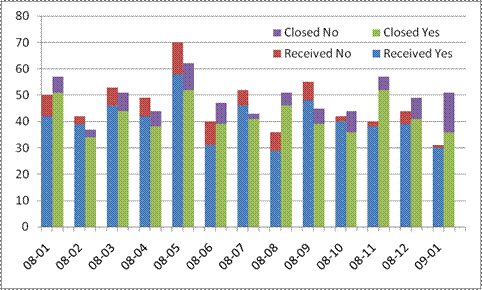

In [15]:
Image("resources/images/040/excel_chart.png")

And the infamous Nigel Holmes "Diamonds" chart that inspired Edward Tufte to coin the term "chart junk":

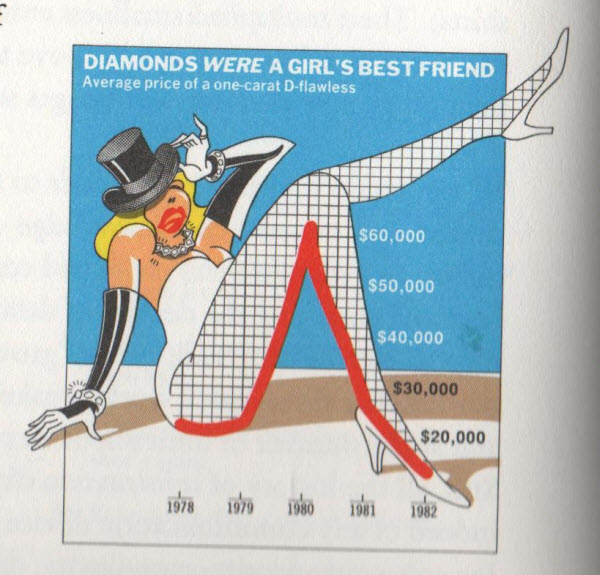

In [16]:
Image( "resources/images/040/diamond_chart.jpg")

Are there any principles, guidelines, rules of thumb for designing charts or is it all just a matter of taste?

## [Cleveland's Research on Decoding](#Contents)

In their paper, *Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods*, William S. Cleveland and Robert McGill set out to determine, *by experiment*, what encodings were most accurate for *decoding* information. The results were expounded upon in Cleveland's book, *The Elements of Graphing Data*. Their results are generally the starting point for discussions about principles.

The idea that charts represent an encoding of data to be decoded by viewers originates with Cleveland and therefore his experiments attempted to answer the following question, "Of all the possible means of encoding data, what encodings lead to the most accurate decodings?".

The encodings he studied were as follows (at the time they were called "perceptual tasks"):

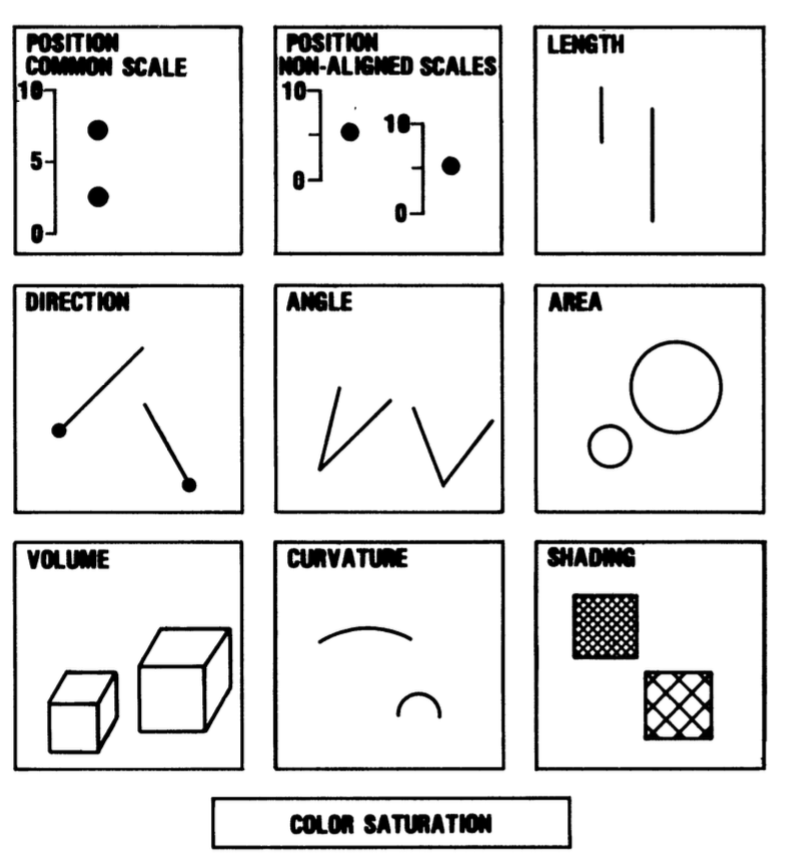

In [20]:
Image("resources/images/040/perceptual_tasks.png", width=500)

We will talk more later about the visual elements--the "alphabet" of visualization. For now, it's enough to recognize the elements as the building blocks of many charts we've seen. **Position on a common scale** includes both scatter plots and bar charts. For example, the bar chart I drew at the start of the notebook has all the bars positioned on a common scale. **Position on non-aligned scales** is best exemplified by the example Excel chart. When we go to compare the red and purple bars we can see that they are not on aligned scales. **Length** is a general feature of bar charts. It is not clear from the paper what **Direction** might be. **Angle** is, of course, a common element of pie charts. **Area**, especially circular area, covers what are often called "triple scatter plots" or "bubble charts" made famous by Hans Rosling's TED talk. **Volume** addresses 3d charts made infamous by Excel. **Curvature** relates to Playfair's charts, especially those containg two lines. **Shading** specifically refers to *cloropleths*...maps shaded in different colors to incidate values (yes, there is a word for those!).



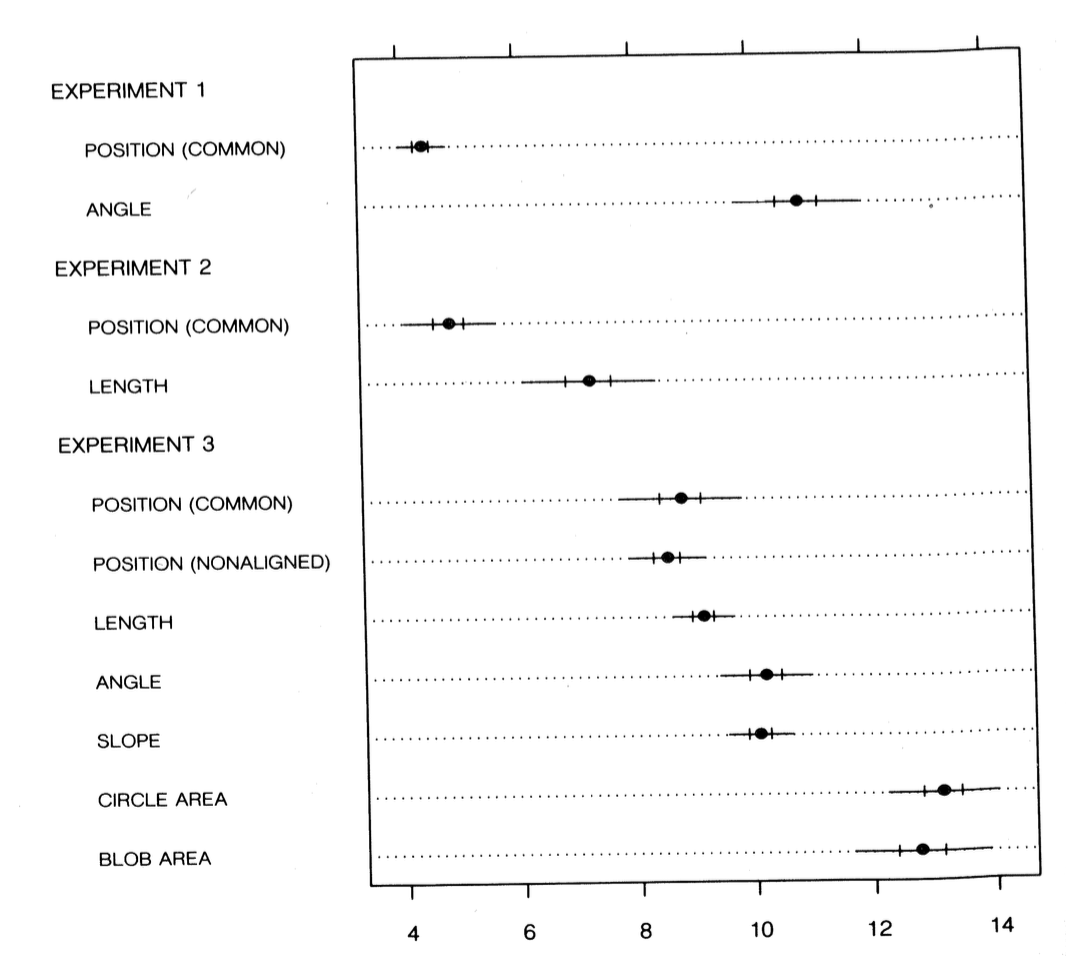

In [22]:
Image("resources/images/040/cleveland_results.png", width=500)

It is generally these results that suggest that bar charts are better than pie charts. It's actually quite easy to demonstrate some of these points...visually. I will pick the most striking examples.

Here is the canonical example of the pie chart v. the bar chart with the same data:

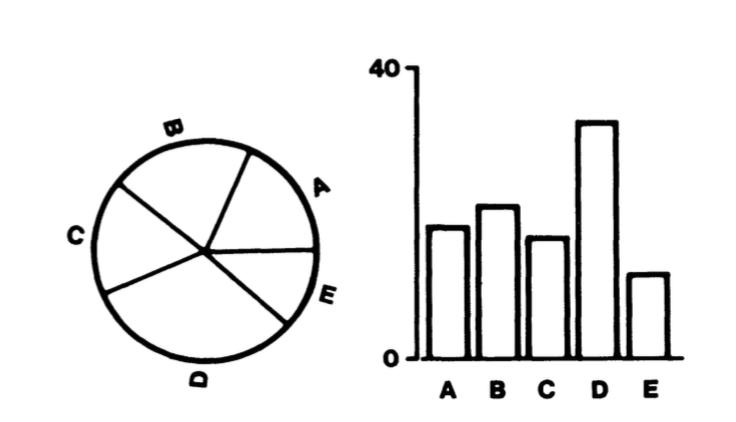

In [24]:
Image( "resources/images/040/pie_v_bar.png", width=500)

Here is a reproduction of a Playfair curve-difference chart that shows the balance of trade of England:

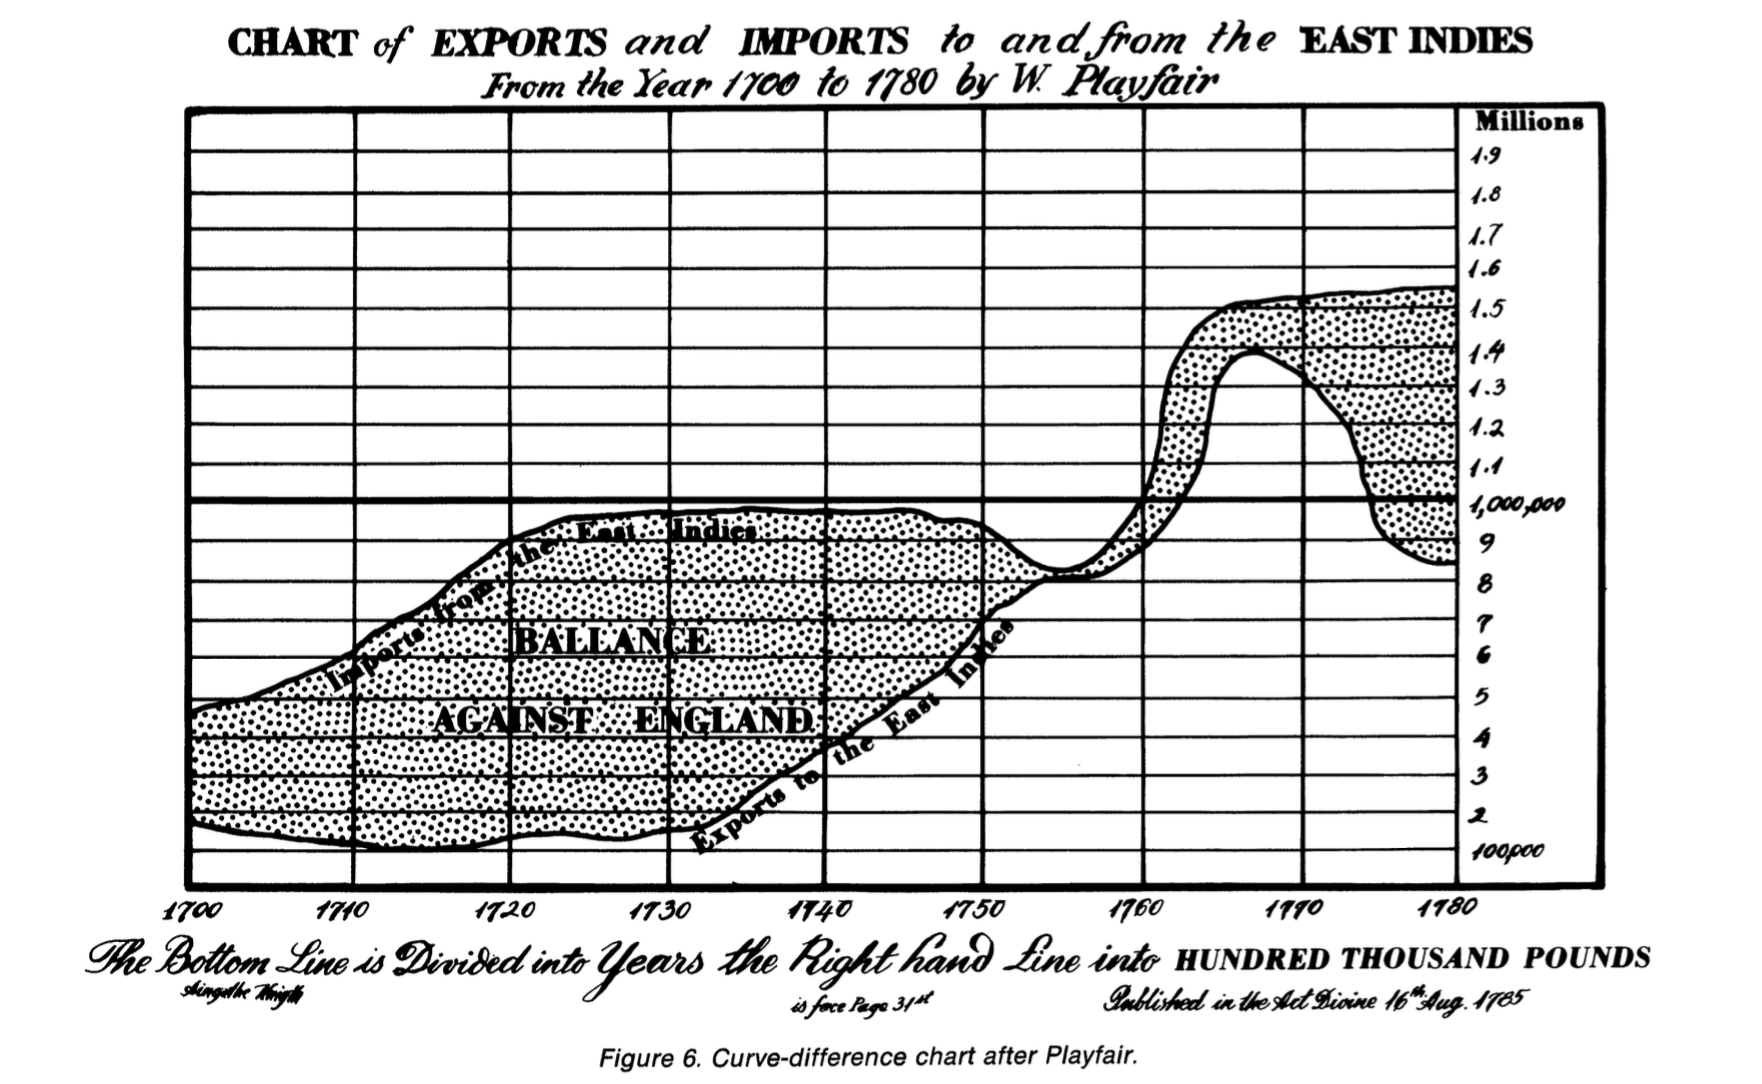

In [33]:
Image("resources/images/040/playfair_curves.png", width=500)

The problem with this chart is that *perceptually* we want to look **perpendicular** differences between the curves, as if they were a map and we had to navigate on a ship. If you just show the difference, you get the following chart:

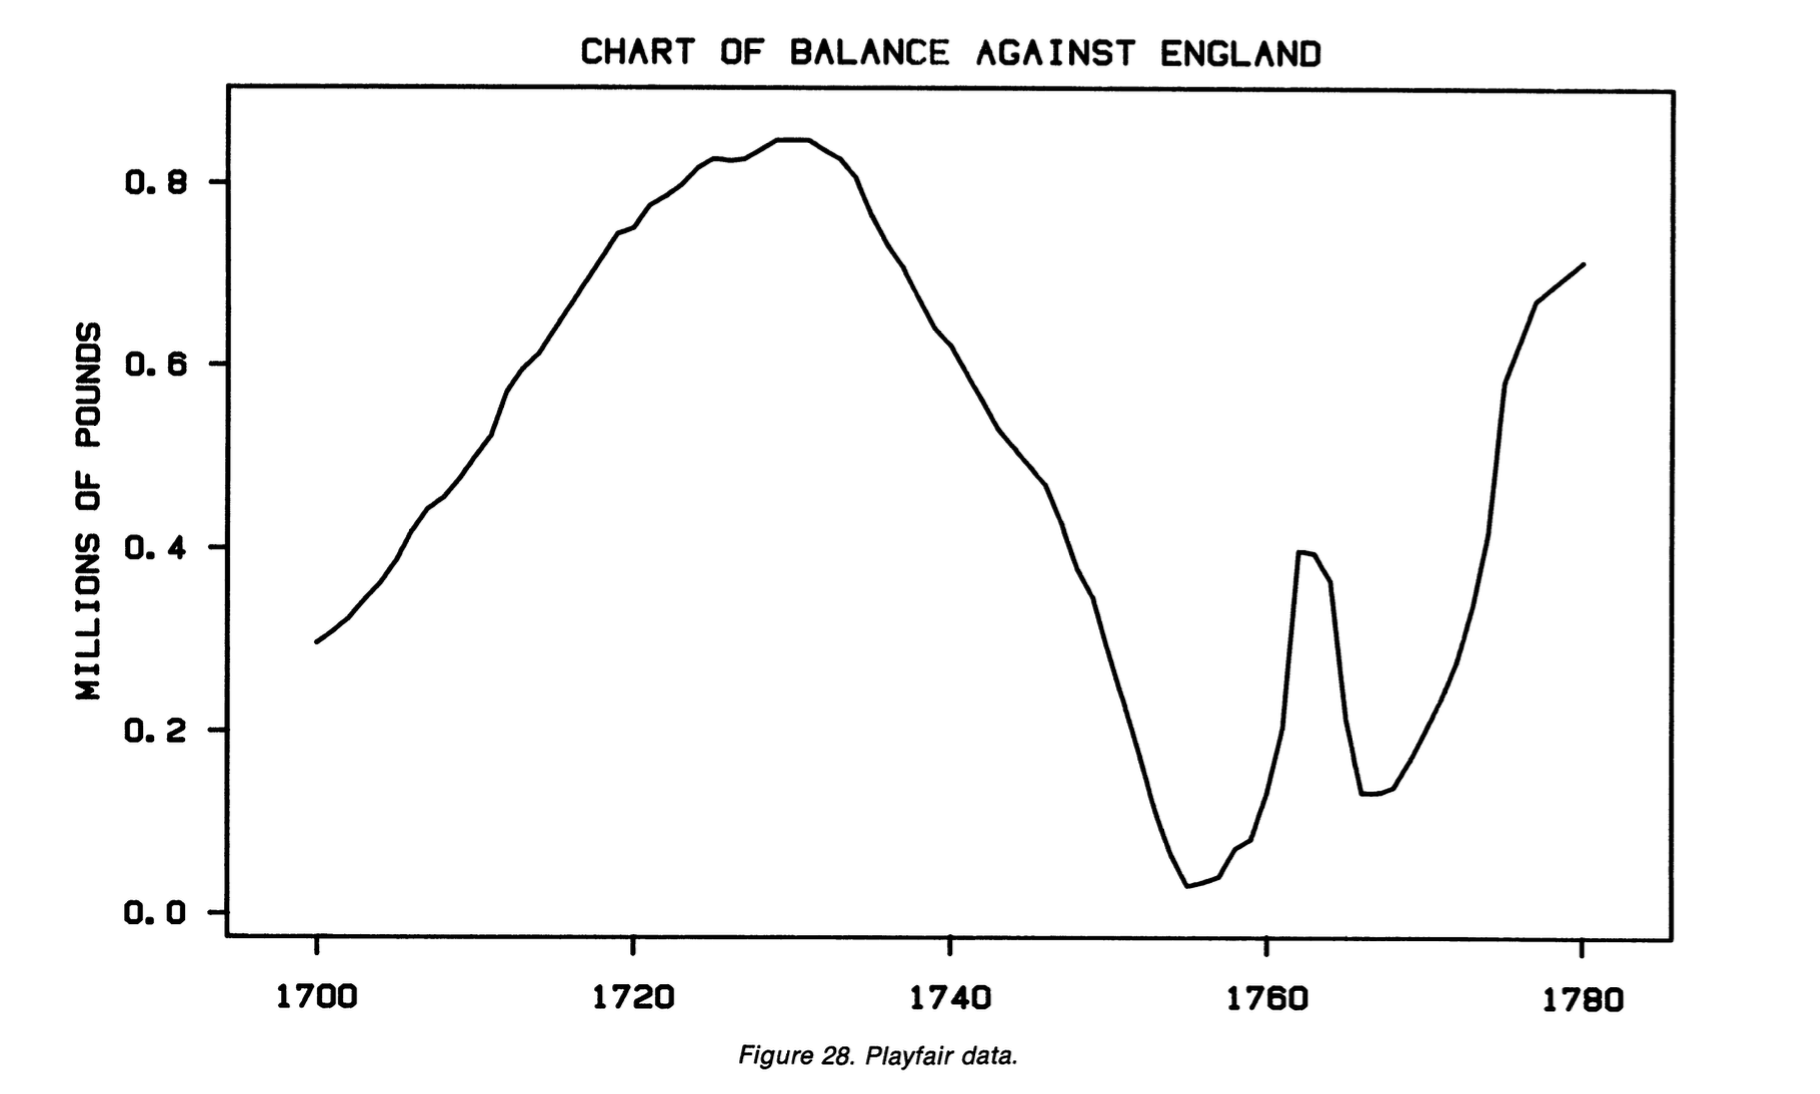

In [32]:
Image("resources/images/040/playfair_difference.png", width=500)

Did you notice the bump in 1763? Probably not.

This is a general problem with curve-difference charts. You're better of plotting the difference or, if you want to show the absolute values as well, plot the difference as well in another chart.

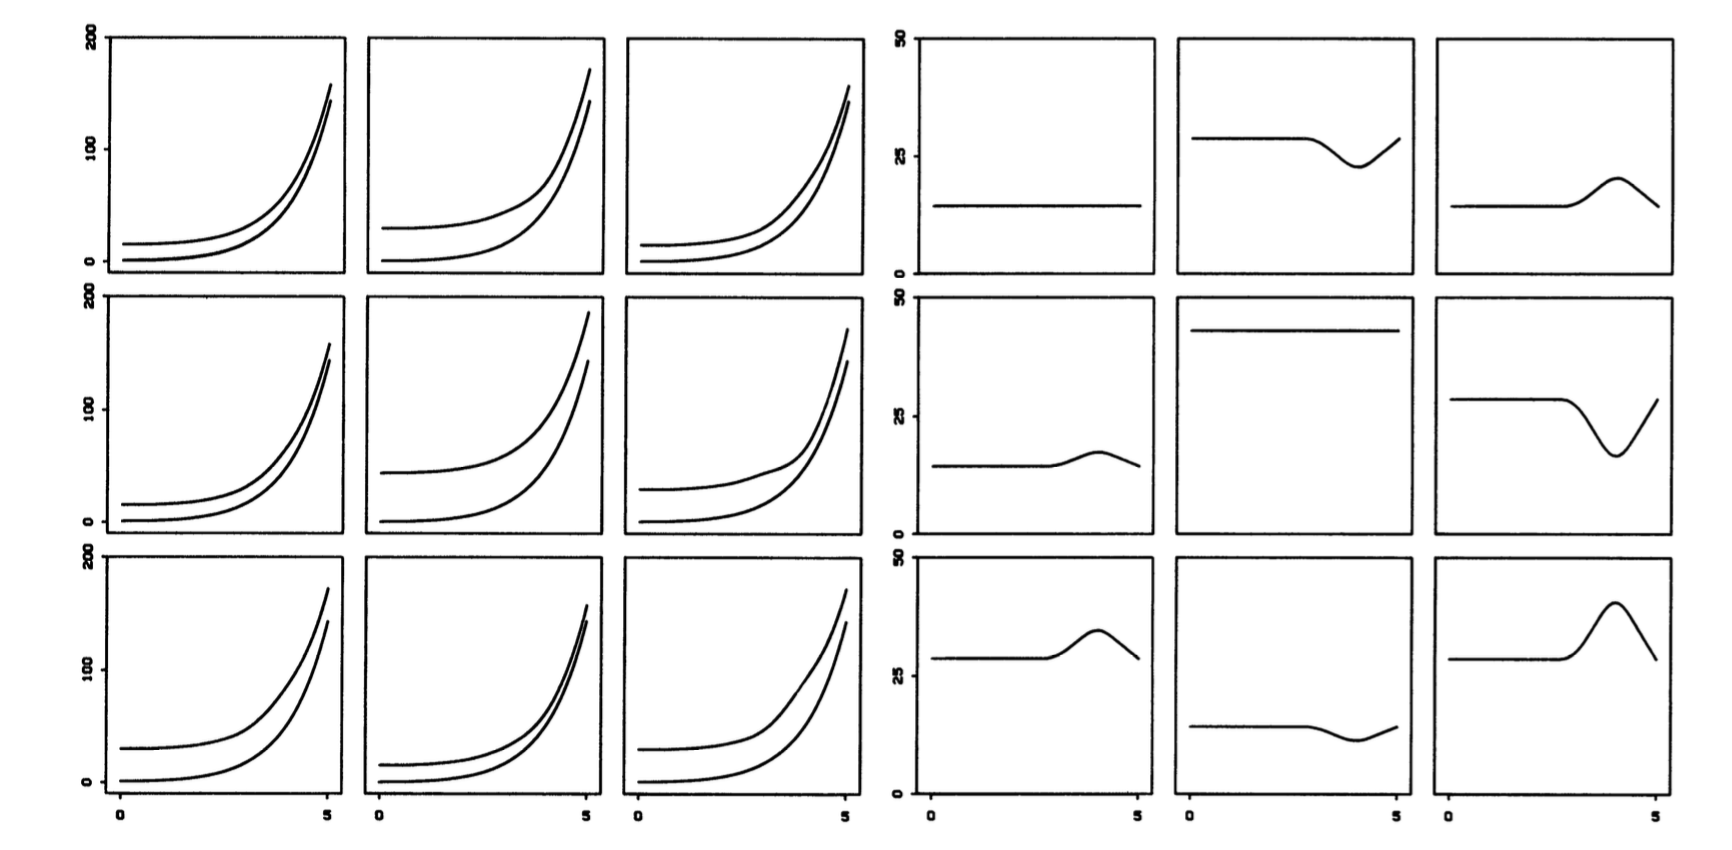

In [34]:
Image("resources/images/040/curve_differences.png", width=500)

As a more general look at the curve-difference phenomena, most of the curves on the left look very similar...did you spot the differences charted on the right?

Finally, here's a typical shaded cloropleth of the United States:

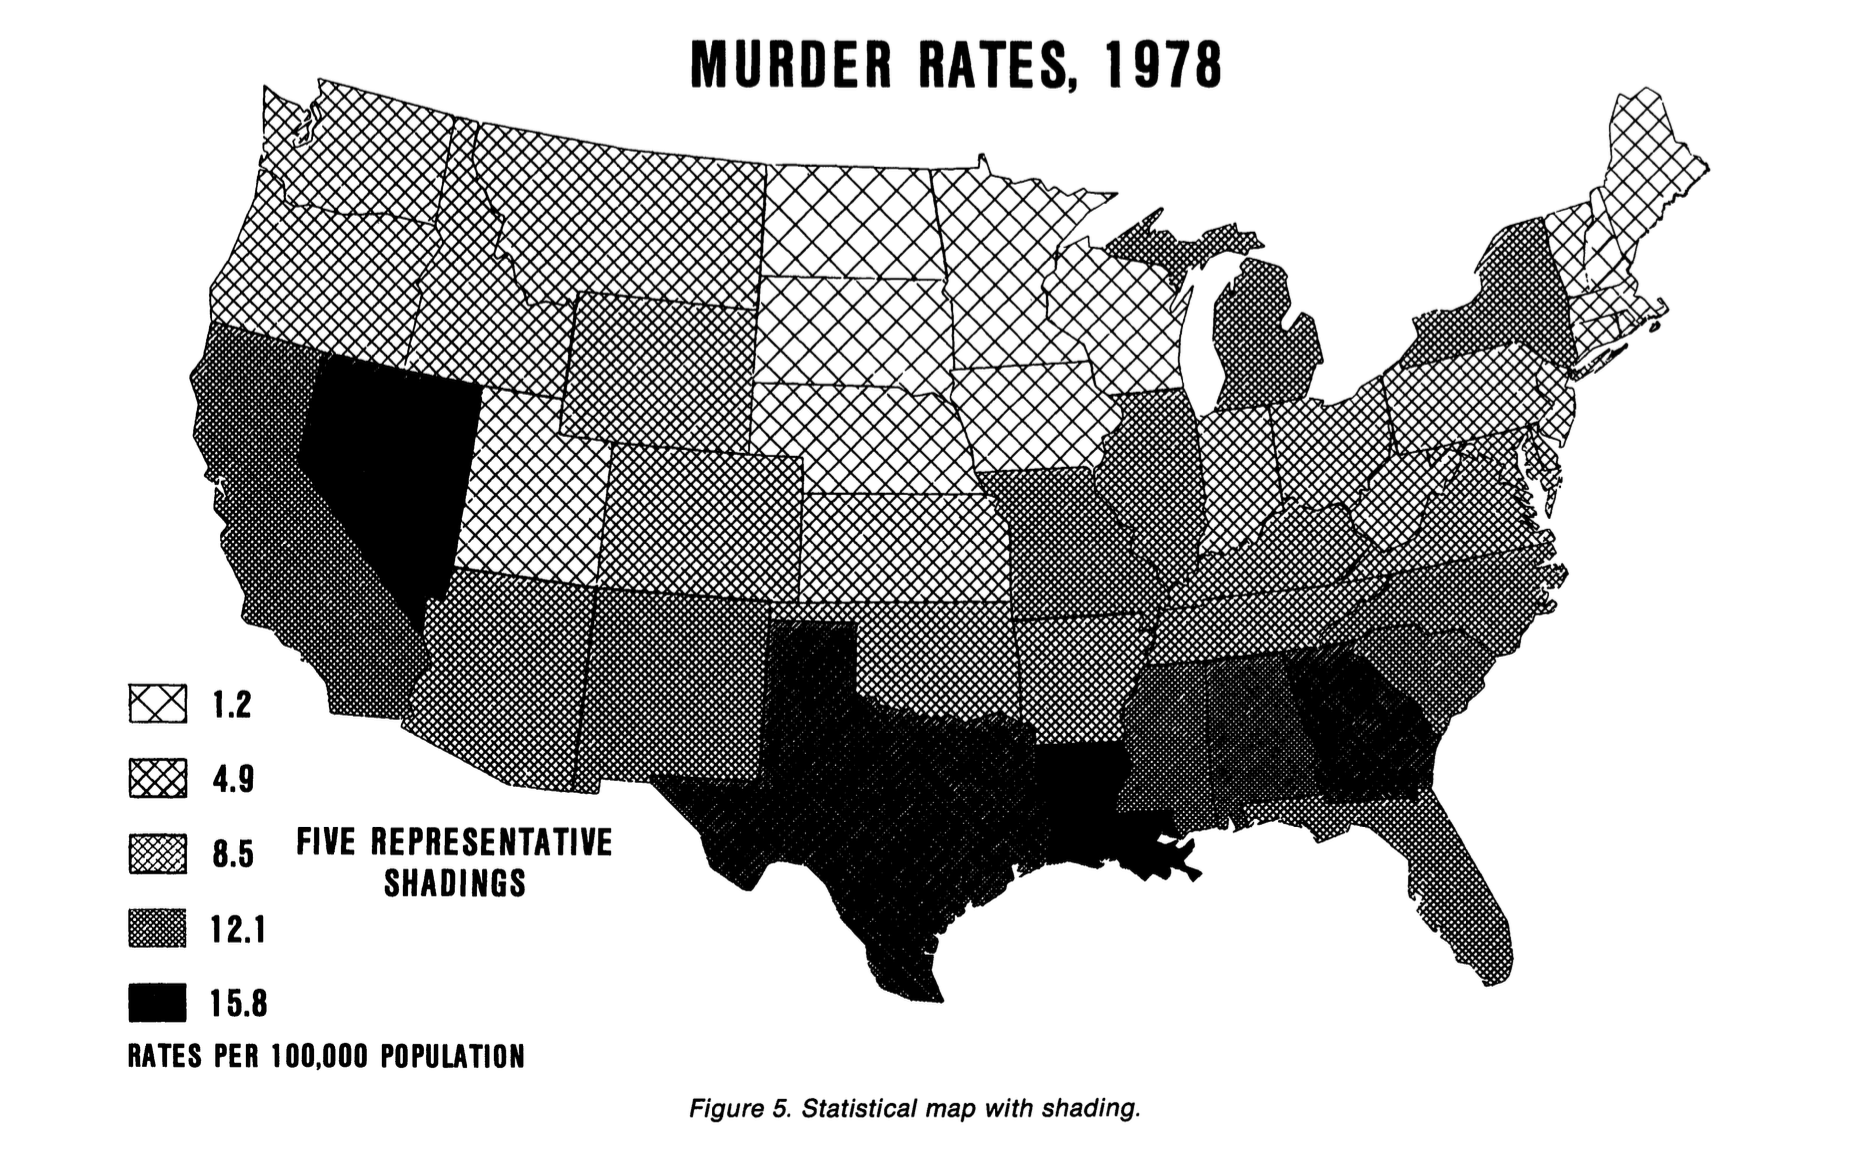

In [30]:
Image("resources/images/040/murder_shaded.png", width=500)

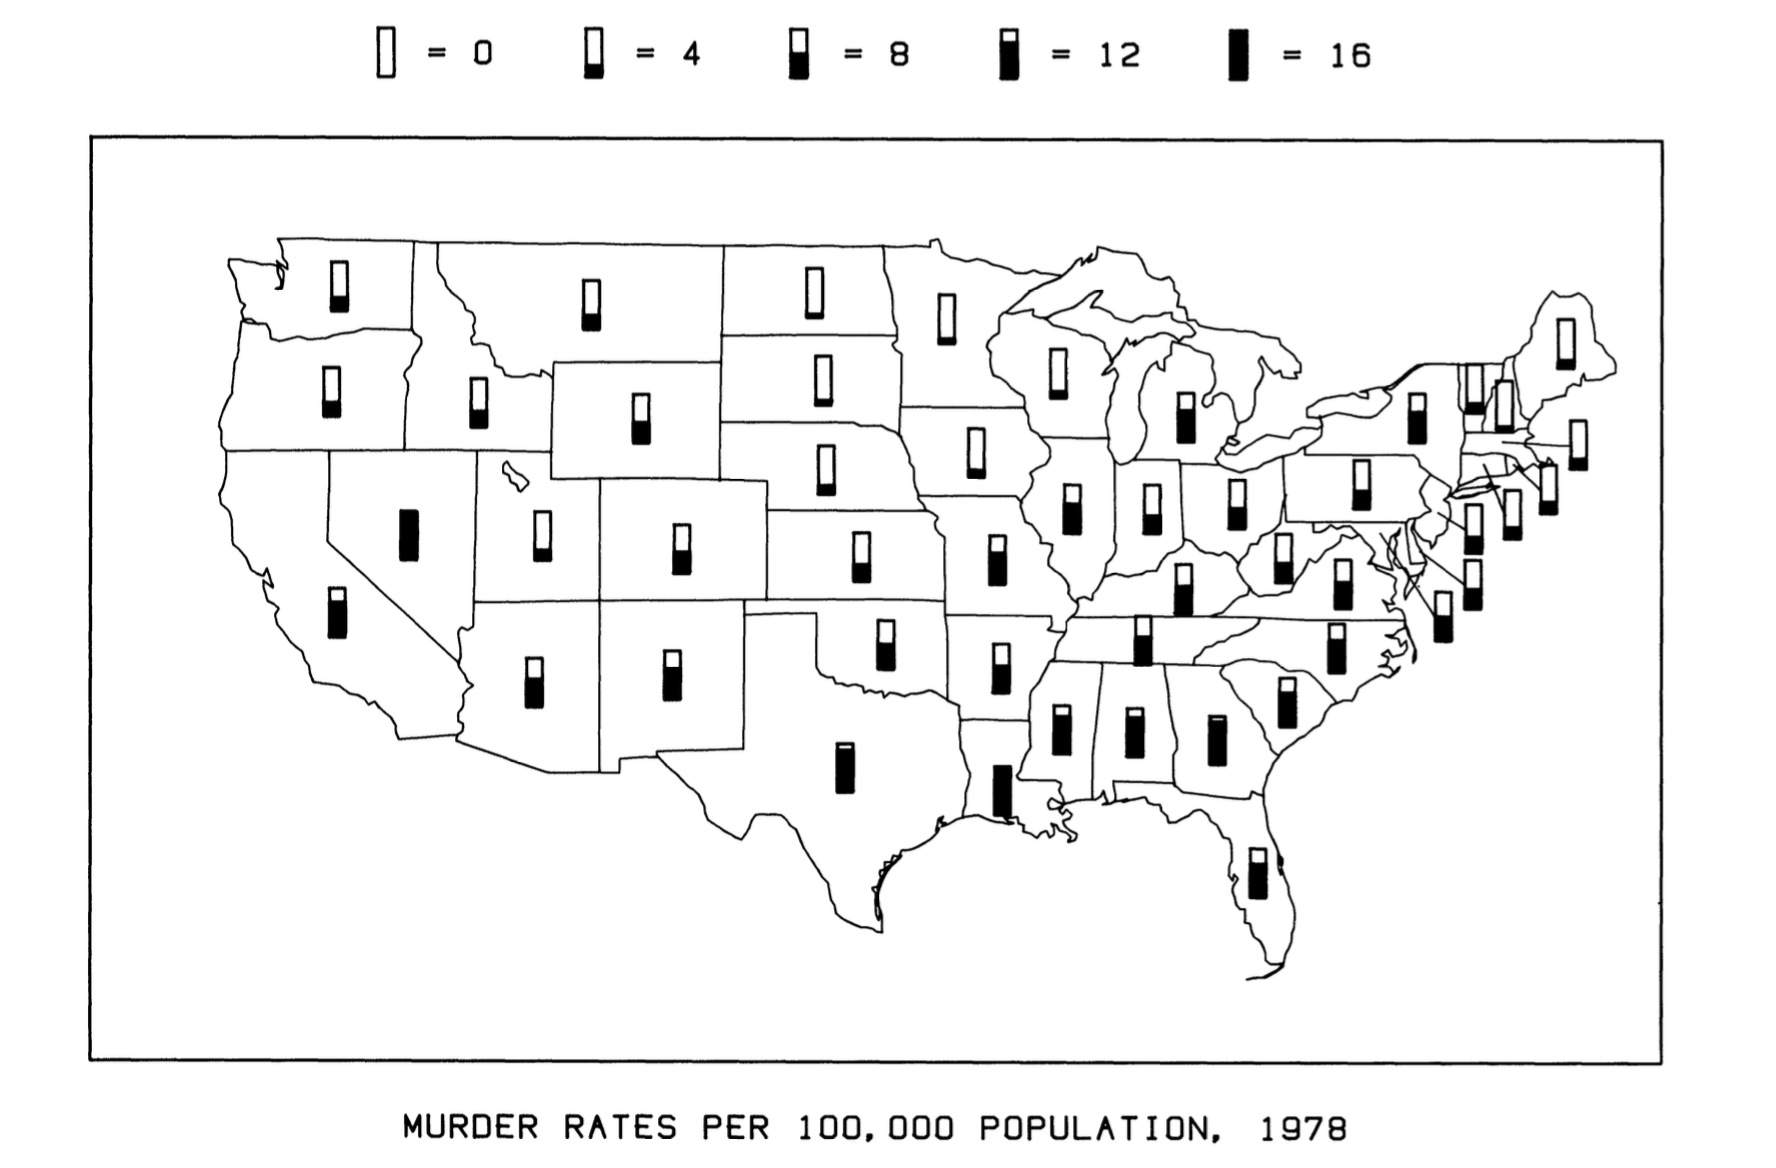

In [31]:
Image("resources/images/040/murder_bars.png", width=500)

While the results depend on which experiment you look at and what perceptual elements were studied, the research largely started the *scientific* investigation of charts and visualization. It has since started to involve psychology and neuroscience.

Next we turn to the basic elements of charts. This discussion follows Stephen Few in *Show Me the Numbers* first by discussing Colin Ware's *Preattentive Processing* and then *Gestalt Principles of Visualization*.

## [Human Preattentive Processing](#Contents)

It is because of preattentive processing that you are not supposed to start the y-axis scale of a  bar chart at anything other than 0 (or it should at least include 0). Here is an example of a bar chart that does start at 0, from earlier:

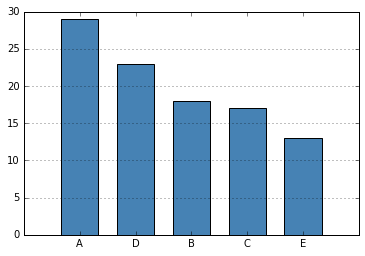

In [87]:
sales = [29, 23, 18, 17, 13]
width = 1/1.5

figure, axes = plt.subplots()

axes.bar(x, sales, width, color="steelblue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(["A", "D", "B", "C", "E"])
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 30))

plt.show()

Now here's one that does not:

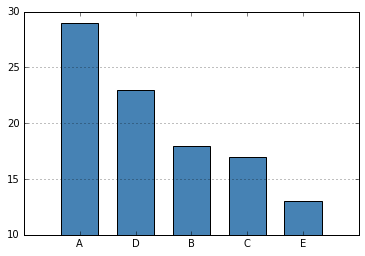

In [88]:
sales = [29, 23, 18, 17, 13]
width = 1/1.5

figure, axes = plt.subplots()

axes.bar(x, sales, width, color="steelblue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(["A", "D", "B", "C", "E"])
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((10, 30))

plt.show()

Given how we visually intepret and subconsiously process area, our first impressions are that B is about 1/2 of A and that E is about 1/2 of C in the second chart. But we "know" this isn't the case. Still, we can't unsee it. This is also why you're not supposed to use *images* as the bars, the widths must be maintained.

One can legitimately say, "but I want to emphasize the differences and the first bar chart does not do that." The problem then is not the desired goal but the chart. You need to use a different chart.

Colin Ware breaks down the basic units of preattentive perception into several "Attributes of Form" and lists whether or to what degree they are suitable for quantitative perception.

| Type     | Attribute   | Quantitatively Perceived? |
|----------|-------------|---------------------------|
| **Form**     | Length      | Yes                       |
|          | Width       | Limited                   |
|          | Orientation | No                        |
|          | Size        | Limited                   |
|          | Shape       | No                        |
|          | Enclosure   | No                        |
| **Color**    | Hue         | No                        |
|          | Intensity   | Limited                   |
| **Position** | 2d Position | Yes                       |

"Yes" indicates that we can, generally, perceive differences in, say, length as quantitative. "Limited" means that we have a limited ability to do so. "No" means that we generally do not. For example, "red" v. "yellow" is not itself 
indicative of anything *quantitative* (although it can be *qualitative* or categorical).

Examples of these attributes are included in the following figures.

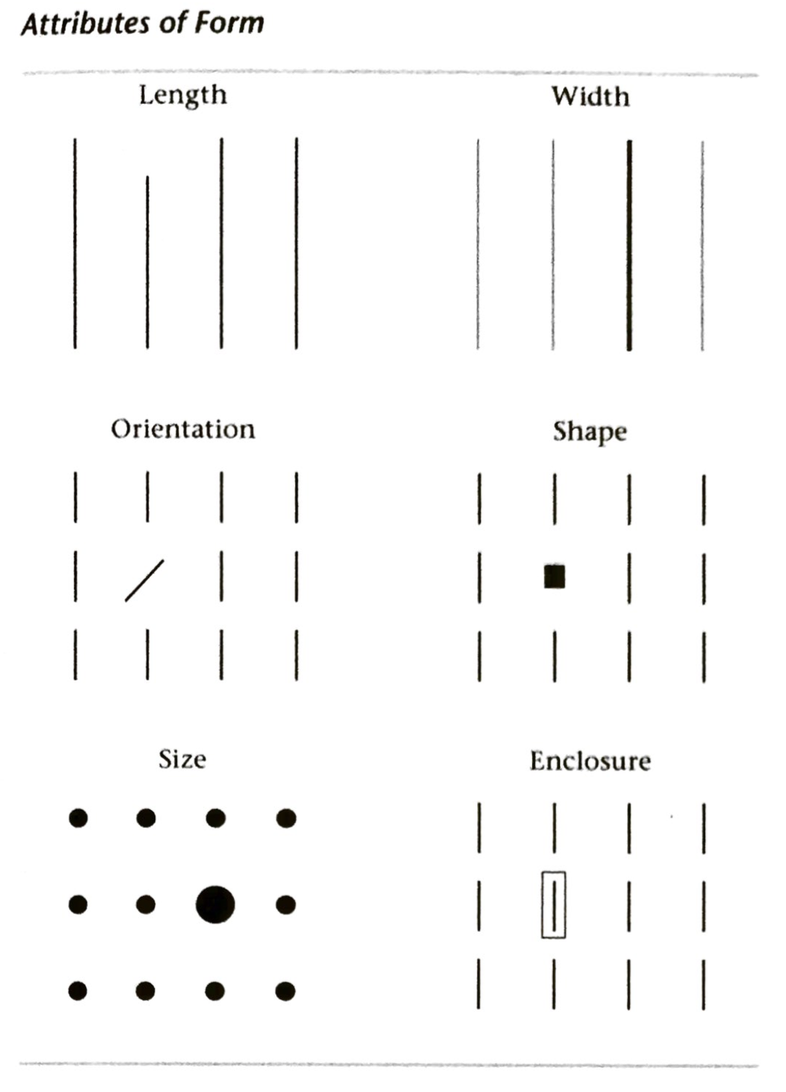

In [40]:
Image("resources/images/040/form.png", width=350)

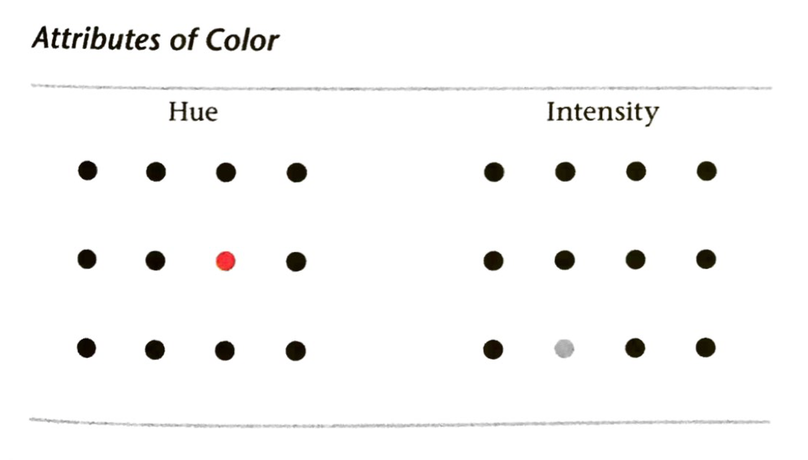

In [42]:
Image( "resources/images/040/color.png", width=350)

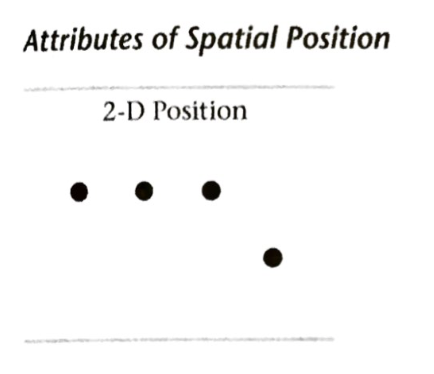

In [45]:
Image( "resources/images/040/space.png", width=200)

Finally, there is the lesson that we can only perceive a limited number of these attributes at once and form any intelligible perception.

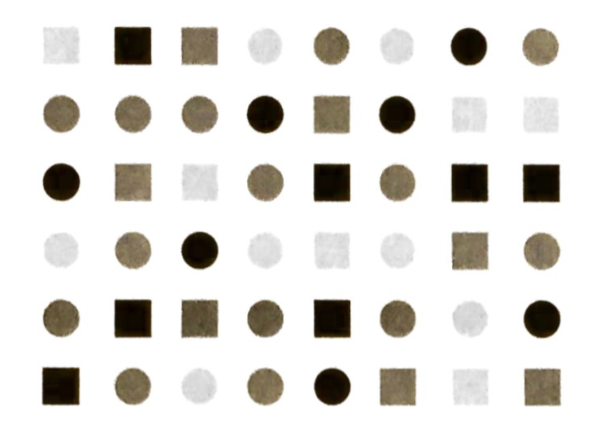

In [47]:
Image("resources/images/040/too_much.png", width=200)

## [Gestalt Principles of Visual Perception](#Contents)

We follow the idea of Preattentive Processing with the Gestalt Principles of Visual Perception. They are:

1. **Principle of Proximity.** Visual elements that are near each other tend to be perceived as being related to each other.
2. **Principle of Similarity.** Visual elements that are similar tend to be perceived as similar, whether by color, size, shape, or orientation.
3. **Principle of Enclosure.** Visual elements enclosed in some way, are perceived as being together, because of the perceived boundary.
4. **Princple of Closure.** Regular visual elements with gaps will be perceived as not having gaps.
5. **Principle of Continuity.** Visual elements that are aligned are perceived as being related.
6. **Principle of Connection.** Visual elements that are connected are perceived as being together.

These Principles have a wide variety of applications *and implications* for visualization. For example, the Principle of Connection informs whether we should connect the dots or not. The Principle of Similarity tells us whether we should color each bar in a bar chart differently or the same.

Principle of Proximity


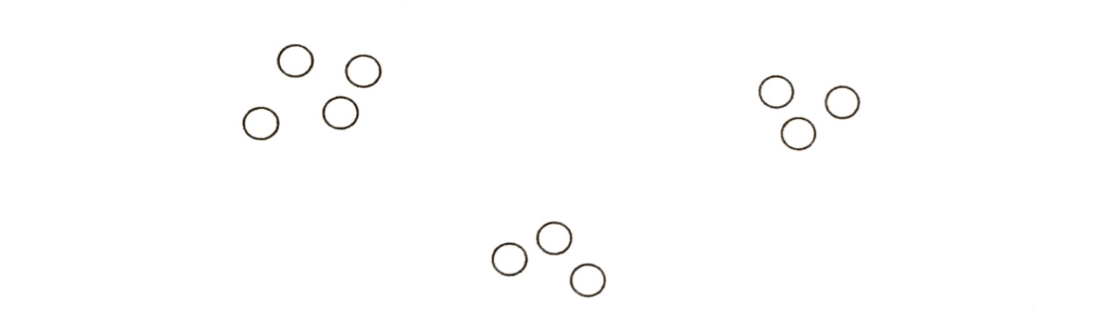

In [50]:
print "Principle of Proximity"
Image("resources/images/040/proximity.png", width=350)

Principle of Similarity


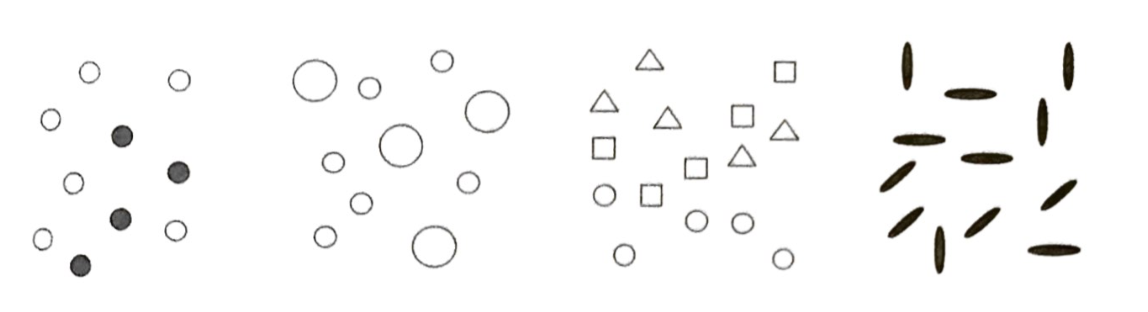

In [51]:
print "Principle of Similarity"
Image("resources/images/040/similarity.png", width=350)

Principle of Enclosure


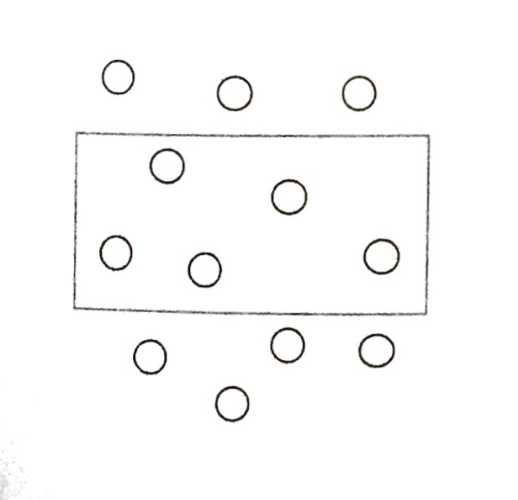

In [53]:
print "Principle of Enclosure"
Image("resources/images/040/enclosure.png", width=200)

Principle of Closure


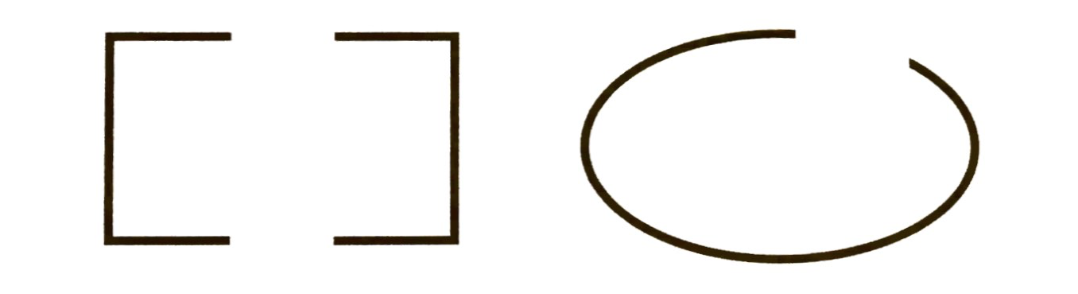

In [55]:
print "Principle of Closure"
Image("resources/images/040/closure.png", width=350)

Principle of Continuity


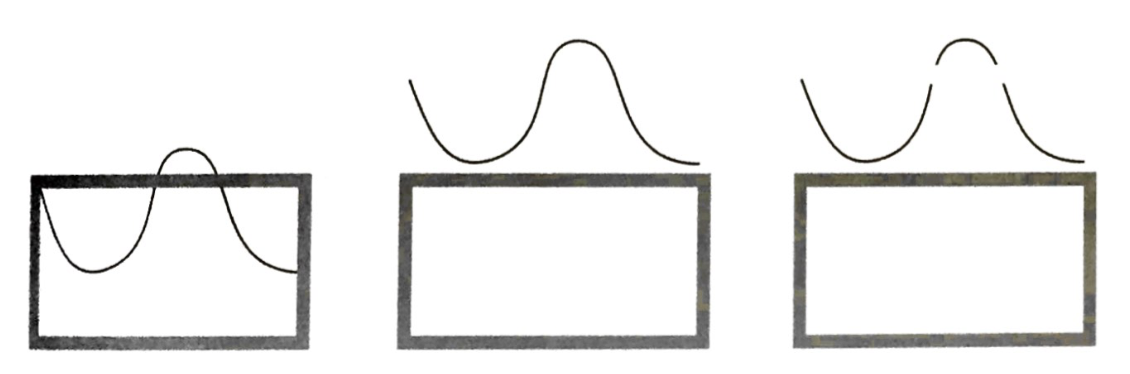

In [56]:
print "Principle of Continuity"
Image("resources/images/040/continuity.png", width=350)

Principle of Connection


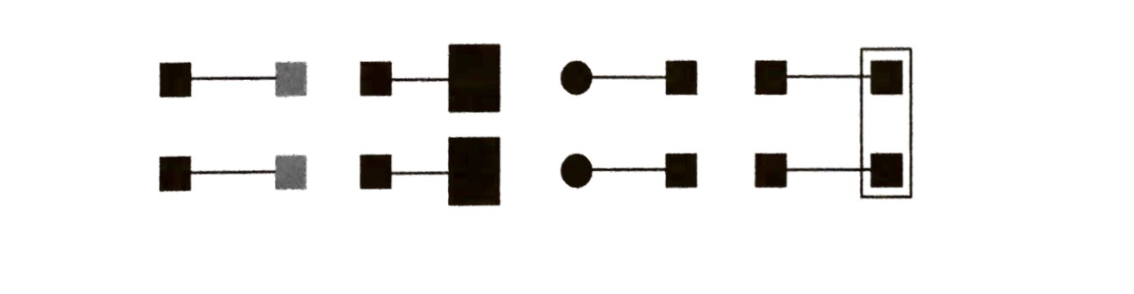

In [57]:
print "Principle of Connection"
Image("resources/images/040/connection.png", width=350)

## [Fundamental Building Blocks](#Contents)

Now with the Attributes of Preattention and the Gestalt Principles of Visual Perception under our belt, we can start talking about the types of charts we want to build and the types of customizations we would entertain, in order to take advantage of these principles.

For Few, this limits our basic elements to:

1. Points
2. Lines
3. Bars
4. Boxes

That's it at least in terms of *quantitative* encoding. For now, we will ignore boxes so that really leaves us points, lines and bars and some combinations.

### Points

From a `matplotlib` point of view, these do not map exactly onto the functions available. For example, using points for *categorical* data is different than using points for *numerical* data. Additionally, you have to do things differently if you want your chart to be horizontal or vertical.

Here's a categorical chart that uses points, *Dot Chart*. A Dot Chart is preferrable to a Bar Chart when you do not wish to include 0 in the y axis. The dotted lines are visual guidelines, especially in horizontal versions, they will go all the way through like gridlines. Both versions are provided here.

Once you understand how `matplotlib` works, you will see that I have essentially used the regular `plot` function and made up fake x-axis data and gave it categorical labels.

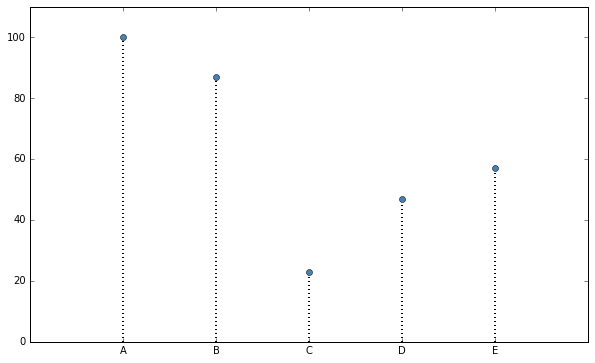

In [69]:
figure = plt.figure(figsize=(10, 6))

xs = [1, 2, 3, 4, 5]
data = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, data, "o", color="steelblue")
axes.vlines(xs, [0], data, linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_ylim((0, 110))
axes.set_xticklabels(["A", "B", "C", "D", "E"])
axes.xaxis.grid(False)

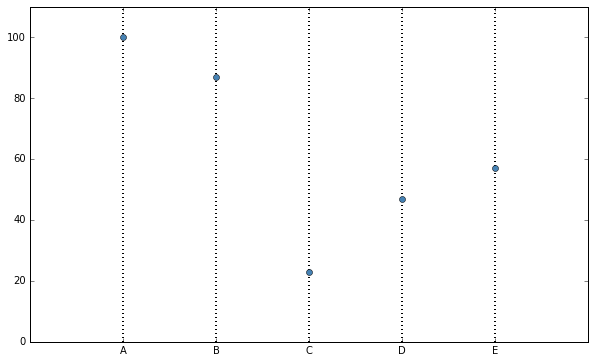

In [70]:
figure = plt.figure(figsize=(10, 6))

xs = [1, 2, 3, 4, 5]
data = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, data, "o", color="steelblue")
axes.vlines(xs, [0], [110], linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_ylim((0, 110))
axes.set_xticklabels(["A", "B", "C", "D", "E"])
axes.xaxis.grid(False)

To use points with numerical data only, we use the same command `plot` and create a *Scatter Plot* or *XY-Plot*.

(10, 110)

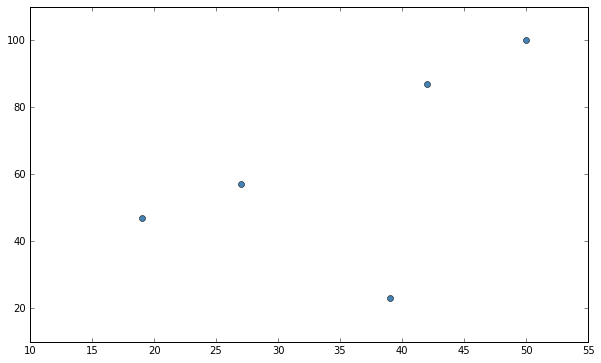

In [77]:
figure = plt.figure(figsize=(10, 6))

xs = [50, 42, 39, 19, 27]
ys = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys, "o", color="steelblue")
axes.set_xlim((10, 55))
axes.set_ylim((10, 110))

Notice that there's no specific reason to start at 0 on the x or y scale.

### Lines

Unless these points follow each other, we should not connect them with lines. If, however, these were readings of two variables that occurred in time, we might connect the points with lines. Note that this uses the Gestalt Principle of Connection...if there is no connection, don't use lines!

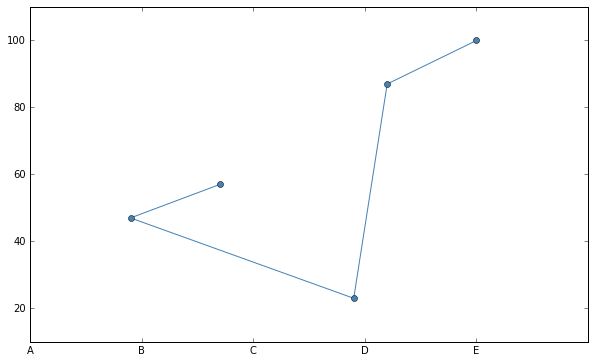

In [82]:
figure = plt.figure(figsize=(10, 6))

xs = [50, 42, 39, 19, 27]
ys = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys, "o-", color="steelblue")
axes.set_xlim((10,60))
axes.set_ylim((10, 110))
axes.set_xticklabels(["A", "B", "C", "D", "E"])


A single value that is recorded over time is often shown with either just line, points or both. There can be various reasons for each. Just a line is often used where the implication that the numerical measurement is *continuous*. Just points are often used when there are breaks in the measurement (for example, no values for weekends). Points and lines can be used together when we want to emphasize both the continuity and the specific values, especially if we are plotting multiple lines.


Note that for `matplotlib`'s purposes, time is categorical. You may need to create an index or use the actual millis on the x-axis and create tick labels for them.

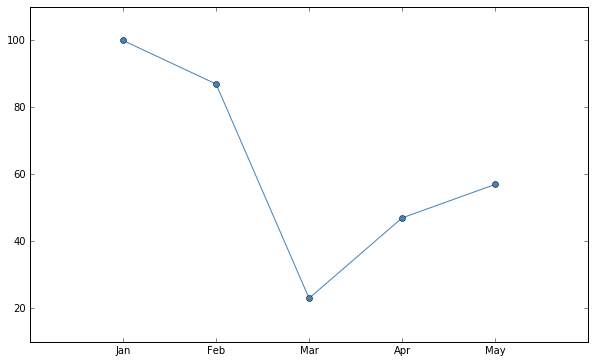

In [84]:
figure = plt.figure(figsize=(10, 6))

xs = [1, 2, 3, 4, 5]
ys = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys, "o-", color="steelblue")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])

Notice how the Gestalt Principle of Closure describes how your perception projects the line out to June.

### Bars

We've already done Bars. We will reproduce the chart from above.

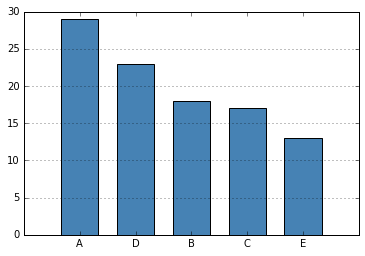

In [85]:
sales = [29, 23, 18, 17, 13]
width = 1/1.5

figure, axes = plt.subplots()

axes.bar(x, sales, width, color="steelblue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(["A", "D", "B", "C", "E"])
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 30))

plt.show()

So those are the basic chart types. Which one you use, and what secondary changes you make (labels, color, "small multiples") depends on what you're trying to accomplish. Additionally, there will be times when you need to use specialized charts but you should always start with these.

## [Expressing Quantitative Relationships with Charts](#Contents)

We use charts to express quantitative relationships in our data (or find them!) by giving shape to those relationships. There are eight (8) basic relationships we use charts to display:

1. Time Series
2. Ranking
3. Part/Whole
4. Deviation
5. Distribution
6. Correlation
7. Geospatial
8. Nominal

Note that these relationships are essentially *messages* we want to convey (stories) about our data. We might want to tell several stories about a particular data set. This implies that you want *one chart per message*. Do not make charts tell more than one story. This is the problem with the Playfair chart. It is telling a Time Series story about the Exports and Imports of England and a Deviation story about the Trade Balance. This should be two charts.

For each of these basic relationships we're going to look at the concepts we use around them and talk about some chart designs for each one. For each, we will consider the following options:

1. (horizontal|vertical) bars
2. (horizontal|vertical) dots
2. points
3. lines
4. points and lines

We're going to look at Nominal first.

### [Nominal](#Contents)

The concepts we normally associate with Nominal relationships include:

    * categorical names
    
Generally, the following options are good for Nominal relationships:

1. horizontal bars|dots
2. vertical bars|dots
3. points

Sometimes horizontal bars are preferred to vertical bars if the labels are overly long. When plotting multiple Nominal relationships we will often add color or plot "small multiples" (to be discussed later). Do not add color to a single nominal relationship.

### [Time Series](#Contents)

The concepts we normally associated with Time Series include:

    * change
    * rise
    * increase
    * fluctuate
    * grow
    * decline
    * decrease
    * trend
    
For Time Series data, you can use:

1. vertical bars
2. points and lines

You can also use *boxes* which we have not yet shown. Boxes do not start at the x-axis as bars do. Instead they start at some minimum value and end at some maximum value. Boxes are good for showing low and high values for a particular observation (say, a stock market price per day).

If there is an obvious continuity in the data, then it is best to use points *and* lines. If the continuity is broken,  you may need to use just points or a combination of points and lines. Sometimes it's better to use vertical bars.

*Never use horizontal bars or dots for Time Series*

### [Ranking](#Contents)

The concepts we normally associated with Ranking include:

    * larger than
    * smaller than
    * equal to
    * greater than
    * less than
    
Generally speaking bar charts are the best chart for Rankings. You can either sort the data from highest to lowest (to emphasize the lowest value and ascending values) or lowest to highest (to emphasize the largest value and descending values).

### [Part/Whole](#Contents)

The concepts we normally associated with Part/Whole include:

    * rate or rate of total
    * percent or percentage of total
    * share
    * accounts for *x* percent
    
We've already ruled out Pie Charts for showing Part/Whole relationships. Noting our problems with comparing non-aligned positions, we're going to suggest bar charts as the best way to represent Part/Whole relationships, either vertical or horizontal.

### [Deviation](#Contents)

The concepts we normally associated with Deviation include:

    * plus or minus
    * variance
    * difference
    * relative to
    
Deviation stories should always be told *as the deviation* and not simply make the viewer calculate the deviation in their head.

The effective displays for deviations are:

* bars (either horizontal or vertical)
* lines (when the deviations are from a Time Series)

### [Distribution](#Contents)

The concepts we normally associated with Distribution include:

    * frequency
    * distribution
    * range
    * concentration
    * normal curve/distribution (and others)
    
We will have a lot to say about distributions later, in the EDA module. In general, we can use:

* vertical bars (as a *histogram*)
* lines (as a *frequency polygon*)
* dots
* boxes (as a *box and whiskers* plot)

as well as combinations of the above to effectively display distributions.

### [Correlation](#Contents)

The concepts we normally associated with Correlation include:

    * increases with
    * decreases with
    * changes with
    * varies with
    * caused by
    * affected by
    * follows

The canonical representation of some kind of correlation is to plot the numerical values on a scatter plot (XY-plot) and insert either a linear or LOESS trend line. Another approach would be to plot two side by side horizontal bar charts, called a *table lens*.

### [Geospatial](#Contents)

The concepts we normally associated with Geospatial relationships include:

    * geography
    * location
    * where
    * region
    * territory
    * country
    * state/province
    * count/borough/parish
    * city
    
In this particular case, the forms (dots, lines, bars) are generally drawn or plotted on a map. Previously, we showed Cleveland's alternative to a shaded map of the US where he put bars in each state instead. Similar solutions include:

* points of varying size
* points or areas of varying color *intensity*
* color intensities applied directly to geographical areas (this was the option Cleveland disliked...notice that not everyone is in agreement!)
* lines of varying thickness or color intensity.

One type of chart that we haven't talked about is the *Heat Map*. A Heat Map can be considered a Geospatial chart in an abstract space, often used to represent a 3rd dimension. I bring this up now because of the mention of color *intensity* and the question of what *color map* to use.

**Do not ever use a rainbow color map**

Unfortunately, this is often the default. The colors of the rainbow do not have a numerical meaning to the eye, that is, red is not greater to or less than blue. There is no natural interpretation. Additionally, the color intensity is not monotonic, it rises and falls, tricking the eye.

Note that we say color *intensity* above. Generally speaking, if the data have no natural zero, you should use a gradient of a single color.

If there is a natural zero, then you can use a divergent gradient, often red/blue.

**Do not use red and green together**

8% of men and 0.2% of women (4.5% of the total population) have some form of color blindness. Red/green color blindness is the most common. Hundreds of dashboards have green for good and red for bad...designed, I imagine, by designers who were not color blind.

## [Chart Parts](#Contents)

The dots, bars and lines may be the stars of the show but when it comes to chart making, there are supporting players as well. Make sure you know how to customize all the parts of your chart, including creating multiple charts, using your particular library.

### [Libraries](#Contents)

There is a fantastic array of libraries available for graphics these days. Some of them let you do things that contradict some of the rules provided here.

We use `matplotlib` because it is the default library provided with Python. We will also make use of [`seaborn`](https://stanford.edu/~mwaskom/software/seaborn/) because it adds some nice styling to the `matplotlib` plots. We do not quite follow Tufte's minimalism to the extreme that he does.

There are other options. [`ggplot2`](http://ggplot2.org/) is a very popular "grammar of graphics" library for R. There is a port of most (it doesn't pretend to be a feature complete port) of [`ggplot`](http://ggplot.yhathq.com/) to Python. This has several advantages. First, if you want to use a "grammar of graphics" style in describing your plots, you can in Python. Second, since the syntax for `ggplot-python` is more or less the same as `ggplot2` for R, learning one means you will have learned the other, modulo some idosyncracies between the two languages.

There are other libraries as well. For pure JavaScript, there is the very popular [`D3`](https://d3js.org/). There is also [`Bokeh`](http://bokeh.pydata.org/en/latest/) ("bouquet") which, I believe can integrate with Jupyter notebooks.

For this class, stick with `matplotlib` and `seaborn`.

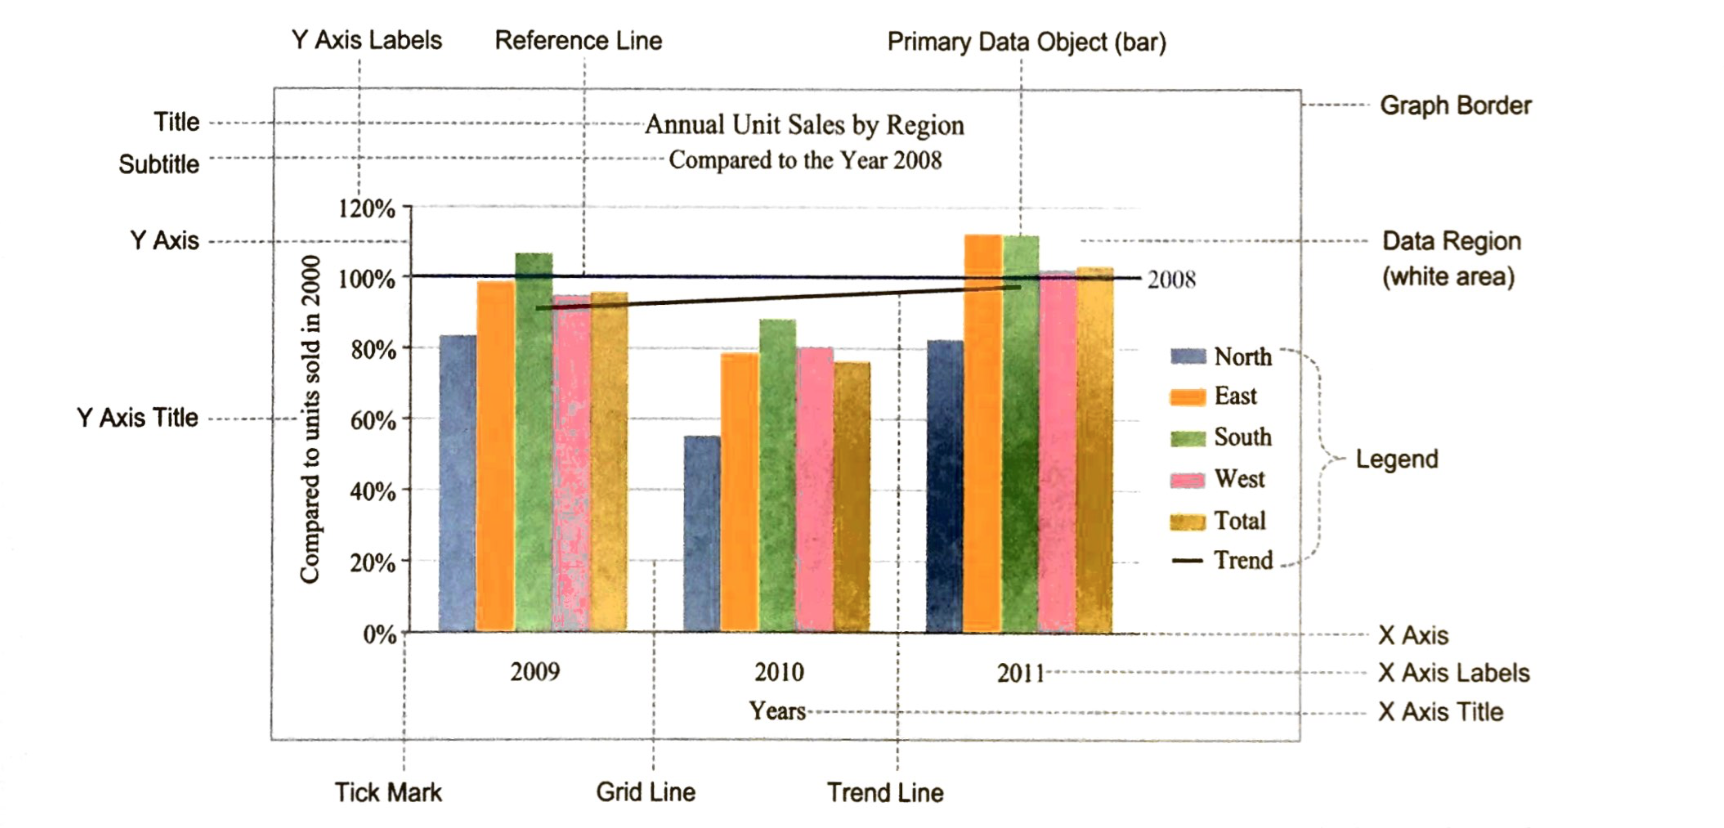

In [89]:
Image("resources/images/040/chart_parts.png")

## [Final Comments](#Contents)

This is a huge topic and we have only scratched enough of the surface to get us by this semester. We have not talked about interactive visualizations or dashboards at all, for example. Nor have we asked the question, should I even do a chart? Sometimes...a lot of the time...you would just be better off using at table. This requires another whole discussion on formatting, fonts, colors, etc. If you are interested, Few's book *Show Me the Numbers* includes an ample discussion about Tables.

### [Small Multiples](#Contents)

It is often the case, that we have the same data for many categories. The tendency is to want to plot all of the data on the same chart, using different colors, symbols, lines. If it is more than three, do not do this.

If it is only 2 or 3, you can use different line types, different colors, or different point symbols.

If it is more than 3, you should use *small multiples*. Small multiples are a grid of the same chart, reproduced over and over again for the same data point but for different categories. The colors should be the same for all charts unless one (or a few) is to be specifically called out. See the color rules below.

### [Rules](#Contents)

For this class, I think we can state the rules as follows:


1. If you want to communicate exact numbers, use a Table. Sometimes a Table, sorted, of 4 numbers is just as effective as a Chart. Our short term memory can handle 4 numbers. Do not create "table charts" where every visual item has the value annotated to it.
2. If you want to communicate relationships in your numbers, use a Chart.
3. If you don't have a relationship, a *message*, don't do anything. Avoid charts for the sake of charts.
3. Use the chart appropriate to the relationship you want to communicate. You may have to try several before you find one that clearly communicates the relationship.
4. A chart should communicate a single relationship. If there are multiple messags to communicate about a variable, use separate charts.
5. When the same relationship is being communicated for more than 3 categories, use small multiples. Use can *always* use small multiples (even for 2 or 3).
6. Do not change colors for "interest", "boredom", "decoration". If you pick CornflowBlue for the first chart, use it for all your charts. Different colors should always mean something. Sometimes you will have a lot of charts that reproduce a theme. For example, suppose you have Time Series charts for members, clubs and sales. It makes sense to make all charts with member data to be one color (blue), all charts with club data use another color (yellow) and all charts with sales use another color (green).
7. Pay attention to use of red/green in the same chart. Be color blind safe.
8. Do not use the rainbow color map.
9. Do not use pie charts ever.
10. Never use the default saturated colors.
11. After you've mastered the rules, break them as needed...but not this semester.

We will revisit some of these topics.

## [References](#Contents)

There are a huge number of books on visualization to reference and digest. Some of the key and helpful works with which I am familiar are:

**General Visualization**
* 1983 [*The Visual Display of Quantitative Information*, Edward Tufte](http://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142)
* 1990 [*Envisioning Information*, Edward Tufte](http://www.amazon.com/Envisioning-Information-Edward-R-Tufte/dp/0961392118)
* 1997 [*Visual Explanations*, Edward Tufte](http://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/0961392126)
* 2006 [*Beautiful Evidence*, Edward Tufte](http://www.amazon.com/Beautiful-Evidence-Edward-R-Tufte/dp/0961392177)

Generally speaking Tufte will tell you what by not how. The books are inspirational but short on details.

**Visualization Principles**
* 1993 [*Visualizing Data*, William S. Cleveland](http://www.amazon.com/Visualizing-Data-William-S-Cleveland/dp/0963488406)
* 1994 [*The Elements of Graphing Data*, William S. Cleveland](http://www.amazon.com/Elements-Graphing-Data-William-Cleveland/dp/0963488414)
* 2004 [*Show Me The Numbers*, Stephen Few](http://www.amazon.com/Show-Me-Numbers-Designing-Enlighten/dp/0970601999)
* 2014 [*Visualization Analysis & Design*, Tamara Munzer](http://www.amazon.com/Visualization-Analysis-Design-AK-Peters/dp/1466508914)

All of these books focus on *how* to do good visualizations. Munzer's book is the most comprehensive in that it includes interactive visualizations. I have focused on Few's book because I find it the most straight-forward and I heartily recommend it.

**Infographics**
* 2012 [*The Functional Art*, Alberto Cairo](http://www.amazon.com/Functional-Art-introduction-information-visualization/dp/0321834739)

Infographics have a different purpose than the typical chart...something often lost in the discussion.

**Dashboards**
* 2013 [*Information Dashboard Design*, Stephen Few](http://www.amazon.com/gp/product/1938377001)

Everybody's got to have a Dashboard these days. Few's book, like his Chart book, is straight-forward. I recommend it as well.

If you want to be "deep" in visualization (remember the Data Scientist "T"), you will need to read and study all of these. There are a few topics that almost everyone agrees on, for example, don't use pie charts. However, this doesn't mean I haven't seen pie charts used effectively. As with many things that involve a part fact and part taste, one has to know the rules before they can be broken. Additionally, the experts do not all agree so sometimes you have to direct your own course. Still, don't use pie charts at least not in my class.